In [1]:
import os
os.getcwdb()

b'c:\\VSC\\SkillFactory\\SkillFactory\\ND\\PY13'

In [2]:
import pandas as pd
import seaborn  as sns
import  matplotlib.pyplot as plt

covid = pd.read_csv("c:/VSC/SkillFactory/SkillFactory/ND/data/covid_data.csv", sep=',')
vaccinations = pd.read_csv('c:/VSC/SkillFactory/SkillFactory/ND/data/country_vaccinations.csv',  sep=',')
vaccinations = vaccinations[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid = covid.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid['date'] = pd.to_datetime(covid['date'])
covid['active'] = covid['confirmed'] - covid['deaths'] - covid['recovered']
covid = covid.sort_values(by=['country', 'date'])
covid['dailyConf'] = covid.groupby('country')['confirmed'].diff()
covid['dailyDeath'] = covid.groupby('country')['deaths'].diff()
covid['dailyRec'] = covid.groupby('country')['recovered'].diff()
vaccinations['date'] = pd.to_datetime(vaccinations['date'])

cdf = covid.merge(vaccinations,  on=['date', 'country'], how='left')

cdf['deathRate'] = cdf['deaths'] / cdf['confirmed'] * 100
cdf['recRate'] = cdf['recovered'] / cdf['confirmed'] * 100




In [3]:
cdf

,date,country,confirmed,deaths,recovered,active,dailyConf,dailyDeath,dailyRec,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,deathRate,recRate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'daily'}, xlabel='date'>

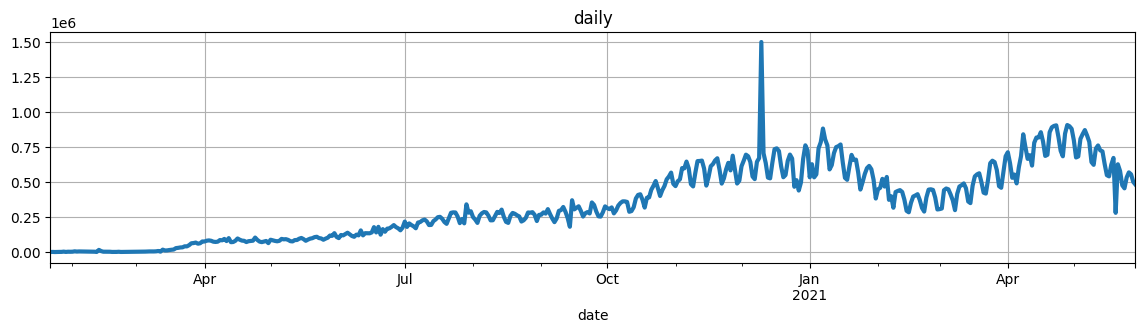

In [4]:
grouped_cases = cdf.groupby('date')['dailyConf'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(14, 3),
    title='daily',
    grid=True,
    lw=3,
)

<Axes: title={'center': 'dayly _cases'}, ylabel='Frequency'>

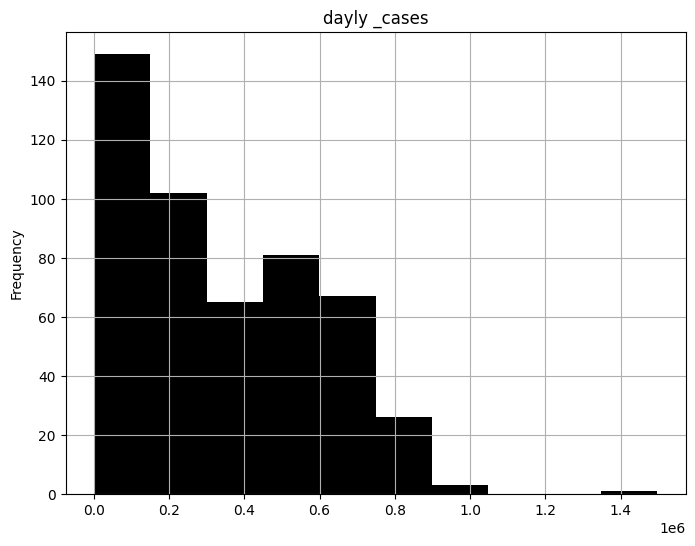

In [5]:
grouped_cases.plot(
    kind='hist',
    bins=10,
    figsize=(8, 6),
    title='dayly _cases',
    grid=True,
    color='black'

)